# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [1]:
# Libraries
import pandas as pd
import numpy as np

# Challenge 1

#### Read the `employees` dataset from Ironhack's database:
* db: `employees`
* table: `employees`

Save your data in a variable called `employees`.

In [ ]:
?pd.read_csv

In [5]:
# your code here
df=pd.read_csv(r'C:/Users/admin/Documents/GitHub/Employee1.csv', sep=';')


In [6]:
df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [7]:
# Method 1
# your code here
df.groupby('Department')['Salary'].mean()

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

In [9]:
# Method 2
# your code here
pd.pivot_table(df, values='Salary', index=['Department'],aggfunc=np.mean)

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [11]:
# your code here
pd.pivot_table(df, values='Salary', index=['Department','Title'],aggfunc=np.mean)

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [20]:
# your code here
pd.pivot_table(df, values=('Years','Salary'), index=['Title'],aggfunc=np.mean)

,Salary,Years
Title,,
VP,70.000000,8.00
analyst,32.500000,2.25
associate,56.666667,4.00


#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [22]:
# your code here
pd.pivot_table(df, values=('Salary','Name'), index=['Department','Title'],aggfunc={'Salary':'mean','Name':'count'})

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [24]:
# your code here
pd.pivot_table(df, values=('Salary'), index=['Department','Title'],aggfunc=('median', 'min', 'max', 'std'))

max  median   min       std
Department Title                                  
HR         VP         70.0    70.0  70.0       NaN
           analyst    35.0    32.5  30.0  3.535534
IT         VP         70.0    70.0  70.0       NaN
           analyst    35.0    32.5  30.0  3.535534
           associate  60.0    60.0  60.0       NaN
Sales      associate  55.0    55.0  55.0  0.000000

In [ ]:
"""
your commments here
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [25]:
# your code here
pd.pivot_table(df, values=('Salary'), index=['Department','Title'],aggfunc=('median', 'min', 'max', 'std'),fill_value=0)

max  median  min       std
Department Title                                
HR         VP          70    70.0   70  0.000000
           analyst     35    32.5   30  3.535534
IT         VP          70    70.0   70  0.000000
           analyst     35    32.5   30  3.535534
           associate   60    60.0   60  0.000000
Sales      associate   55    55.0   55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [26]:
# your code here
pd.pivot_table(df, values=('Name','Salary'), index=['Department'],aggfunc={'Name':'count','Salary':'sum'})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [27]:
# your code here
pd.pivot_table(df, values=('Years','Salary'), index=['Department','Title'],aggfunc={'Years':'count','Salary':'mean'})

Salary  Years
Department Title                   
HR         VP           70.0      1
           analyst      32.5      2
IT         VP           70.0      1
           analyst      32.5      2
           associate    60.0      1
Sales      associate    55.0      2

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [33]:
# your code here
def mean_without_max(ser):
    return np.mean([i for i in ser if i!=ser.max()])
df.pivot_table(index='Department',values='Salary',aggfunc=mean_without_max)

C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\admin\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,Salary
Department,
HR,32.500000
IT,41.666667


# Challenge 2

#### Read the `fitbit` dataset from Ironhack's database:
* db: `fitbit`
* table: `fitbit`

Save your data in a variable called `fitbit`.

In [34]:
# your code here
df=pd.read_csv('C:\\Users\\admin\\Documents\\GitHub\\data-labs\\module-2\\lab-pivot-table-and-correlation\\your_code\\fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [35]:
# your code here
df.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


In [38]:
df.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [44]:
# your code here
r=np.corrcoef(df['Minutes Very Active'], df['Steps'])[0][1]
r

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [45]:
import matplotlib.pyplot as plt;

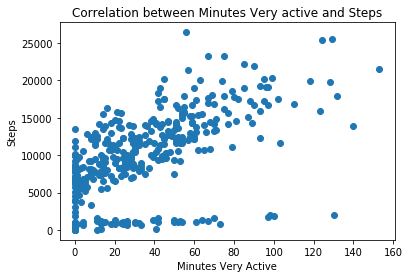

In [47]:

plt.scatter(df['Minutes Very Active'], df['Steps'])
plt.title('Correlation between Minutes Very active and Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.show()


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [50]:
# your code here
r1=np.corrcoef(df['Minutes Sedentary'], df['Steps'])[0][1]
r1

0.07690608062990094

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

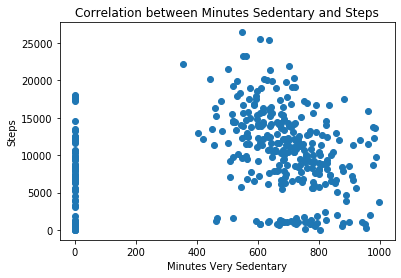

In [53]:
# your code here
# your code here
plt.scatter(df['Minutes Sedentary'], df['Steps'])
plt.title('Correlation between Minutes Sedentary and Steps')
plt.xlabel('Minutes Very Sedentary')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [52]:
# your code here
r2=np.corrcoef(df['MinutesOfSleep'], df['Steps'])[0][1]
r2

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

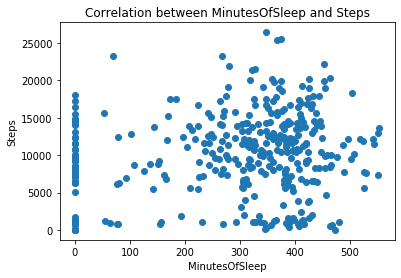

In [54]:
# your code here
plt.scatter(df['MinutesOfSleep'], df['Steps'])
plt.title('Correlation between MinutesOfSleep and Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.show()

In [ ]:
"""
your commments here
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [55]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [58]:
# your code here
df1=df[columns]
df1

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
0,1934,905,0,1.355,0,384
1,3631,18925,4,611.000,60,454
2,3204,14228,1,602.000,77,387
3,2673,6756,8,749.000,4,311
4,2495,502,1,876.000,0,407
...,...,...,...,...,...,...
362,3796,18588,16,599.000,79,377
363,3525,16382,16,684.000,55,406
364,3649,21913,19,701.000,90,280
365,3539,19023,15,575.000,85,370


In [60]:
cor_fit=df1.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [62]:
# your code here
cor_fit.Steps.sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Read the `time_grades` dataset from Ironhack's database:
* db: `time_grades`
* table: `time_grades`

Save your data in a variable called `time_grades`.

In [63]:
# your code here
df=pd.read_csv('C:\\Users\\admin\\Documents\\GitHub\\data-labs\\module-2\\lab-pivot-table-and-correlation\\your_code\\Time_Grades.csv')

#### Show visually the frequency distribution of the `time_grades` dataset.

In [64]:
# your code here
df.describe()

,Study time,Grade
count,15.000000,15.000000
mean,9.000000,5.933333
std,5.182388,2.711527
min,2.000000,1.000000
25%,5.500000,3.500000
50%,8.000000,7.000000
75%,11.500000,8.000000
max,20.000000,9.000000


#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [69]:
# your code here
df.corr(method='pearson')

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [70]:
# your code here
df.corr(method='spearman')

,Study time,Grade
Study time,1.000000,0.819659
Grade,0.819659,1.000000


In [ ]:
"""
your commments here
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

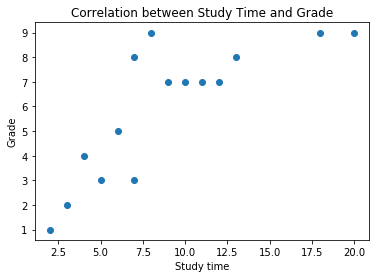

In [71]:
# your code here
plt.scatter(df['Study time'], df['Grade'])
plt.title('Correlation between Study Time and Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.show()

In [ ]:
"""
your commments here
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [ ]:
"""
your commments here
"""